# Import

importing the library that will be used for this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Getting the Data

using pandas_datareader to obtain the historical stock information of following companies

1. Google
2. Facebook
3. Microsoft
4. Amazon
5. Apple
6. Netflix

In [2]:
import pandas_datareader
import datetime

In [3]:
import pandas_datareader.data as web

In [4]:
start = datetime.datetime(2020,1,1)
end = datetime.datetime(2020,8,1)

In [5]:
google = web.DataReader('GOOGL','yahoo',start,end)

In [6]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,1368.680054,1346.489990,1348.410034,1368.680054,1363900,1368.680054
2020-01-03,1373.750000,1347.319946,1348.000000,1361.520020,1170400,1361.520020
2020-01-06,1398.319946,1351.000000,1351.630005,1397.810059,2338400,1397.810059
2020-01-07,1403.500000,1391.560059,1400.459961,1395.109985,1716500,1395.109985
2020-01-08,1411.849976,1392.630005,1394.819946,1405.040039,1765700,1405.040039


In [7]:
facebook = web.DataReader('FB','yahoo',start,end)

In [8]:
microsoft = web.DataReader('MSFT','yahoo',start,end)

In [9]:
amazon = web.DataReader('AMZN','yahoo',start,end)

In [10]:
apple = web.DataReader('AAPL','yahoo',start,end)

In [11]:
netflix = web.DataReader('NFLX','yahoo',start,end)

# Visualizing the data

1. Plotting linear plot

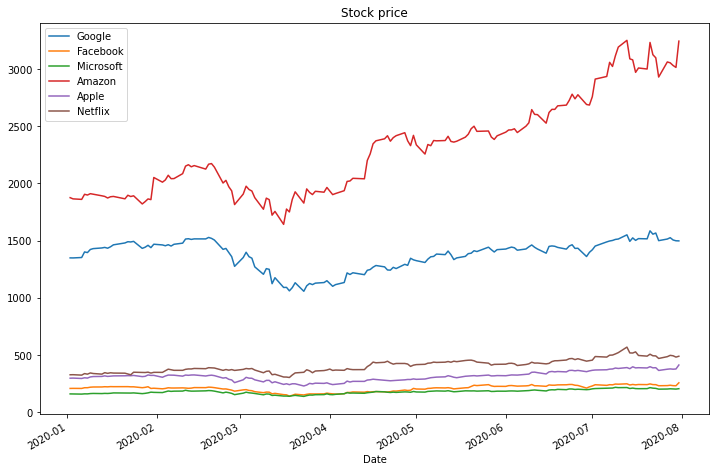

In [12]:
google['Open'].plot(label='Google',figsize=(12,8),title='Stock price')
facebook['Open'].plot(label='Facebook')
microsoft['Open'].plot(label='Microsoft')
amazon['Open'].plot(label='Amazon')
apple['Open'].plot(label='Apple')
netflix['Open'].plot(label='Netflix')
plt.legend()

2. Plotting the volume of stock traded each day

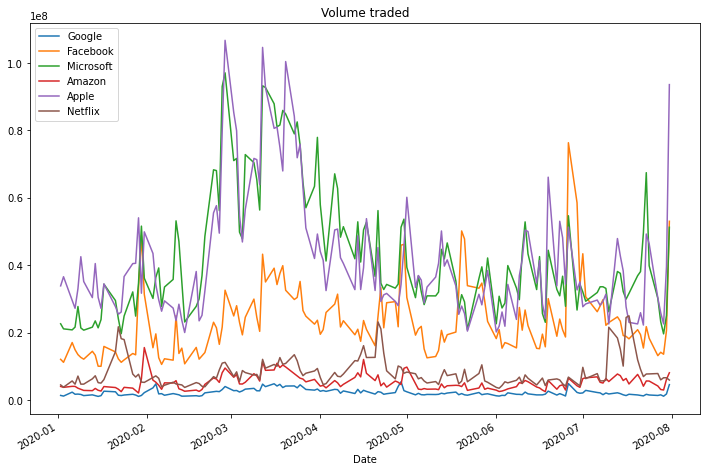

In [13]:
google['Volume'].plot(label='Google',figsize=(12,8),title='Volume traded')
facebook['Volume'].plot(label='Facebook')
microsoft['Volume'].plot(label='Microsoft')
amazon['Volume'].plot(label='Amazon')
apple['Volume'].plot(label='Apple')
netflix['Volume'].plot(label='Netflix')
plt.legend();

3. Calculating and plotting total money traded each day

In [14]:
google['Total Traded'] = google['Open']*google['Volume']
facebook['Total Traded'] = facebook['Open']*facebook['Volume']
microsoft['Total Traded'] = microsoft['Open']*microsoft['Volume']
amazon['Total Traded'] = amazon['Open']*amazon['Volume']
apple['Total Traded'] = apple['Open']*apple['Volume']
netflix['Total Traded'] = netflix['Open']*netflix['Volume']

Plotting "Total Traded" against the time index.

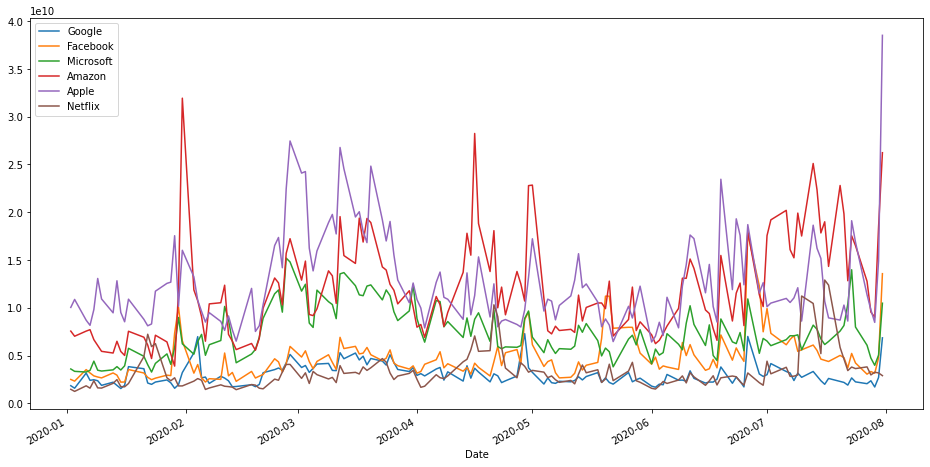

In [15]:
google['Total Traded'].plot(label='Google',figsize=(16,8))
facebook['Total Traded'].plot(label='Facebook')
microsoft['Total Traded'].plot(label='Microsoft')
amazon['Total Traded'].plot(label='Amazon')
apple['Total Traded'].plot(label='Apple')
netflix['Total Traded'].plot(label='Netflix')
plt.legend();

4. Plotting moving averages (MA7 and MA30)

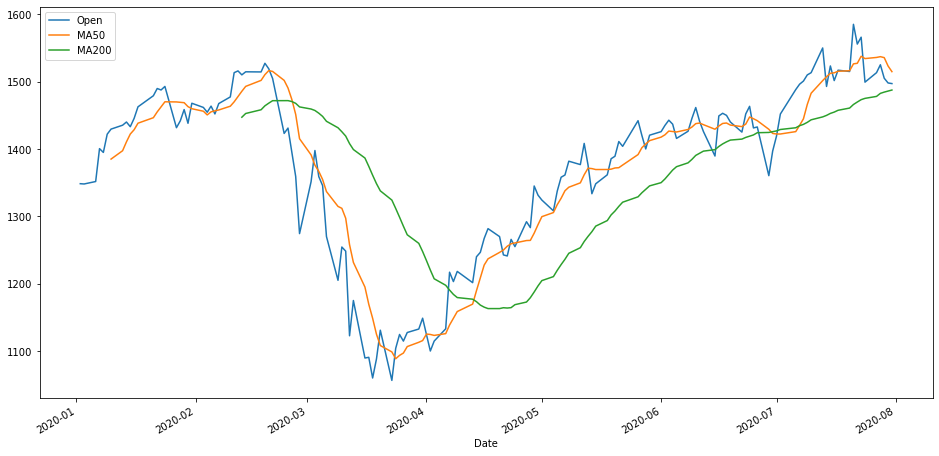

In [16]:
google['MA50'] = google['Open'].rolling(7).mean()
google['MA200'] = google['Open'].rolling(30).mean()
google[['Open','MA50','MA200']].plot(figsize=(16,8))

Checking if there is any relationship between these stocks, after all, they are all related to the technology. We can see this easily through a scatter matrix plot

In [17]:
from pandas.plotting import scatter_matrix

In [18]:
tech_comp = pd.concat([google['Open'],facebook['Open'],microsoft['Open'],amazon['Open'],apple['Open'],netflix['Open']],axis=1)

In [19]:
tech_comp.columns=['Google Open','Facebook Open','Microsoft Open','Amazon Open','Apple Open','Netflix Open']

In [20]:
tech_comp.head()

,Google Open,Facebook Open,Microsoft Open,Amazon Open,Apple Open,Netflix Open
Date,,,,,,
2020-01-02,1348.410034,206.750000,158.779999,1875.000000,296.239990,326.100006
2020-01-03,1348.000000,207.210007,158.320007,1864.500000,297.149994,326.779999
2020-01-06,1351.630005,206.699997,157.080002,1860.000000,293.790009,323.119995
2020-01-07,1400.459961,212.820007,159.320007,1904.500000,299.839996,336.470001
2020-01-08,1394.819946,213.000000,158.929993,1898.040039,297.160004,331.489990


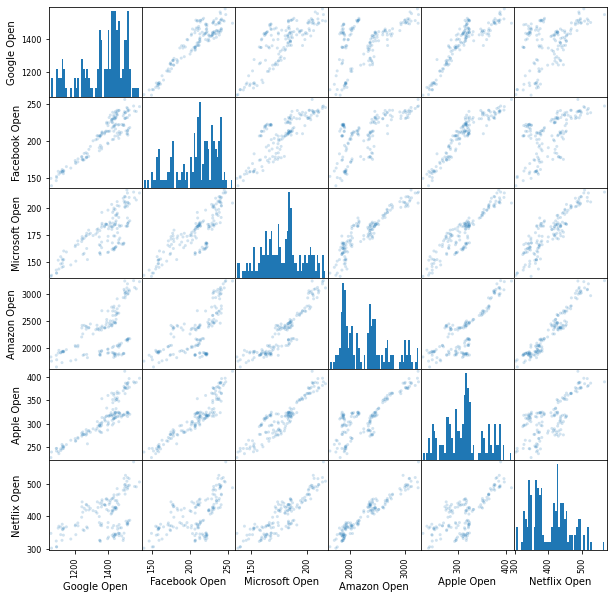

In [21]:
scatter_matrix(tech_comp,figsize=(10,10),alpha=0.2,hist_kwds={'bins':50});

# Candle Stick Visualization

In [22]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY



ModuleNotFoundError: No module named 'matplotlib.finance'